<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-библиотек" data-toc-modified-id="Загрузка-библиотек-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка библиотек</a></span></li><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Загрузка данных</a></span></li><li><span><a href="#Подготовка" data-toc-modified-id="Подготовка-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Подготовка</a></span><ul class="toc-item"><li><span><a href="#Предобработка" data-toc-modified-id="Предобработка-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Предобработка</a></span></li><li><span><a href="#Приведение-к-нижнему-регистру" data-toc-modified-id="Приведение-к-нижнему-регистру-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Приведение к нижнему регистру</a></span></li><li><span><a href="#Очистка-текста" data-toc-modified-id="Очистка-текста-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Очистка текста</a></span></li><li><span><a href="#Лемматизация-текста" data-toc-modified-id="Лемматизация-текста-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Лемматизация текста</a></span></li></ul></li><li><span><a href="#Разделение-на-выборки" data-toc-modified-id="Разделение-на-выборки-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Разделение на выборки</a></span></li><li><span><a href="#Создание-выборок" data-toc-modified-id="Создание-выборок-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Создание выборок</a></span></li><li><span><a href="#Обучение-моделей" data-toc-modified-id="Обучение-моделей-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Обучение моделей</a></span><ul class="toc-item"><li><span><a href="#Логистическая-регрессия" data-toc-modified-id="Логистическая-регрессия-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Логистическая регрессия</a></span></li><li><span><a href="#Случайный-лес" data-toc-modified-id="Случайный-лес-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Случайный лес</a></span></li><li><span><a href="#Метод-опорных-векторов" data-toc-modified-id="Метод-опорных-векторов-6.3"><span class="toc-item-num">6.3&nbsp;&nbsp;</span>Метод опорных векторов</a></span></li><li><span><a href="#Проверка-на-вменяемость" data-toc-modified-id="Проверка-на-вменяемость-6.4"><span class="toc-item-num">6.4&nbsp;&nbsp;</span>Проверка на вменяемость</a></span></li><li><span><a href="#Проверка-лучшей-модели-на-тестовой-выбоке" data-toc-modified-id="Проверка-лучшей-модели-на-тестовой-выбоке-6.5"><span class="toc-item-num">6.5&nbsp;&nbsp;</span>Проверка лучшей модели на тестовой выбоке</a></span></li></ul></li><li><span><a href="#Выводы" data-toc-modified-id="Выводы-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Выводы</a></span></li></ul></div>

# Проект для интернет-магазина

Интернет-магазин запускает новый сервис. Теперь пользователи могут редактировать и дополнять описания товаров, как в вики-сообществах. То есть клиенты предлагают свои правки и комментируют изменения других. Магазину необходим инструмент, который будет искать токсичные комментарии и отправлять их на модерацию. В нашем распоряжении набор данных с разметкой о токсичности правок.

Цель: обучить две разные модели, классифицирующие комментарии на позитивные и негативные.

Критерий успеха: значением метрики качества *F1* не меньше 0.75.

**Инструкция по выполнению проекта**

1. Загрузите и подготовьте данные.
2. Обучите разные модели. 
3. Сделайте выводы.

**Описание данных**

Данные находятся в файле `toxic_comments.csv`. Столбец *text* в нём содержит текст комментария, а *toxic* — целевой признак.

## Загрузка библиотек

In [1]:
import pandas as pd #Pandas
import numpy as np #Numpy
import random
import nltk
import re

import matplotlib.pyplot as plt

from sklearn.model_selection import GridSearchCV 
from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.dummy import DummyClassifier
from sklearn import svm 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import f1_score, make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline

from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
from nltk.corpus import stopwords as nltk_stopwords
from nltk.tag.perceptron import PerceptronTagger
from nltk.probability import FreqDist

from tqdm import tqdm

## Загрузка данных

In [2]:
try:
    df = pd.read_csv('toxic_comments.csv',index_col = 0)
except:
    df = pd.read_csv('/datasets/toxic_comments.csv',index_col = 0)

## Подготовка

### Предобработка

Смотрим информацию о данных и содержимое

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 159292 entries, 0 to 159450
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   text    159292 non-null  object
 1   toxic   159292 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 3.6+ MB


In [4]:
df.sample(25)

,text,toxic
72325,ello \n\nwhats our name,0
149059,now i will verge on a personal attack by sayin...,0
153045,""", 1 April 2009 (UTC)\nSome reviewers have obj...",0
102784,"cie \n\ni am sorry about that mistake, still ...",0
73149,That;s an effect of the Anthropocene (possibly...,0
9325,Replied on your talk page. (chew)(do),0
153023,"""\n\n Please do not vandalize pages, as you di...",0
79840,I was just pointing out what we all know to be...,0
109959,"""\nThe problem is, the argument you have prese...",0
50427,Arcayne - I appreciate your reasoned involveme...,0


In [5]:
df.index

Int64Index([     0,      1,      2,      3,      4,      5,      6,      7,
                 8,      9,
            ...
            159441, 159442, 159443, 159444, 159445, 159446, 159447, 159448,
            159449, 159450],
           dtype='int64', length=159292)

Доля положительных (0) и отрицательных (1) оценок

In [6]:
df.groupby('toxic').count().\
apply(lambda x: x*100/df.groupby('toxic').count()['text'].sum())

,text
toxic,
0,89.838787
1,10.161213


**Промежуточный вывод**
- Данные загружены без ошибок
- Имеется явный дисбаланс классов (токсичных коментраиев всего около 10%), что ожидаемо.
- Комментарии "сырые" - требуют очистки от неинформативных включений

###  Приведение к нижнему регистру

Приведем весь текст к нижнему регистру

Создадим корпус тектов

In [7]:
corpus = list(df['text'])

In [8]:
corpus = list(map(lambda x: x.lower() , corpus))

Проверяем результат

In [9]:
corpus[22]

'"\n\n snowflakes are not always symmetrical! \n\nunder geometry it is stated that ""a snowflake always has six symmetric arms."" this assertion is simply not true! according to kenneth libbrecht, ""the rather unattractive irregular crystals are by far the most common variety."" http://www.its.caltech.edu/~atomic/snowcrystals/myths/myths.htm#perfection someone really need to take a look at his site and get facts off of it because i still see a decent number of falsities on this page. (forgive me im new at this and dont want to edit anything)"'

### Очистка текста

Создадим функцию для очистки текста. 
- оставим только английские буквы, 
- уберем короткие слова длиной меньше 3 символов
- уберем длинные слова длиной больше 11 символов
- уберем из текста повторяющиеся слова
- ограничим длину текста 600 символами

In [10]:
def clear_text(text):
    
    clear_text = re.sub(r'[^a-zA-Z]', ' ', text) 
    clear_text = re.sub(r'\b\w{1,2}\b', ' ', clear_text)
    clear_text = re.sub(r'\b\w{12,}\b', ' ', clear_text)
    clear_text = clear_text.split()
    clear_text = " ".join(sorted(set(clear_text),key=clear_text.index))
  # clear_text = " ".join(clear_text)
    clear_text = clear_text[0:601]
    
    return clear_text

Проверяем работу функции clear_text

In [11]:
print("Исходный текст:", corpus[114])
print()
print("Очищенный текст:", clear_text(corpus[114]))

Исходный текст: paleontologists agree that organic remains must be buried quickly so they can be preserved long enough to be come fossilized.  however, the term fossilized is not a very precise term.  there are several factors and metamorphic mineral processes which occur to organic remains that result in what is typically called a fossil.  one major factor concerns what kind of organisms are to be fossilized  vertebrate, invertebrates, radiolarians, sponges, plants, pollen, foot prints, etc.  and multiple processes may include permineralization, recrystalization, carbonization, replacement, dissolving, diagenesis, etc.  talking about fossilization is a complex issue, however quick burial is not questioned.

the major question is, how long does it take for these processes to work on organic reamins in the environment they are found in?  experimental taphonomy has resulted in an assortment of remains becoming fossilized by various processes in the lab, which of course implies that given

Очищаем текст

In [12]:
%%time
corpus = list(map(lambda x: clear_text(x) , corpus))

CPU times: user 13.6 s, sys: 0 ns, total: 13.6 s
Wall time: 14.5 s


Проверяем результат

In [13]:
random.sample(corpus,5)

['kumar born balarampur kalitola post rangadih dist purulia',
 'the grammar has been updated took time update and rearrange some sentence structure one person point out general discussion web forum that definitely not official but did delete information like probably should have instead simply pointed midway highest ranking ceohas officially confirmed will publish unreal tournament for xbox although epic currently does acknowledge they are developing version prevent from publishing game could easily develop their own outsource development another developer let forget primary platform outsourced port because easy program games since similar however playstati',
 'concept have added prod template the article suggesting that deleted according proposed deletion process all are appreciated but don believe satisfies wikipedia criteria for inclusion and explained why notice see also what not policy please either work improve topic worthy you disagree with discuss issues its talk page removing 

### Лемматизация текста

Создадим объект класса WordNetLemmatizer

In [14]:
lemmatizer = WordNetLemmatizer()

Создадим функцию для лемматизации текста

In [15]:
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')

tagger = PerceptronTagger() 

#словарь для выбора части речи
tag_dict = {"J": wordnet.ADJ,
            "N": wordnet.NOUN,
            "V": wordnet.VERB,
            "R": wordnet.ADV}

def lemmatize(text):
    
    word_list = nltk.word_tokenize(text)   
    lemmatized_output = \
    ' '.join([lemmatizer.lemmatize\
              (w,tag_dict.get\
               (tagger.tag([w])[0][1][0].\
                upper(),wordnet.NOUN)) for w in word_list])
    
    return lemmatized_output

[nltk_data] Downloading package punkt to /home/jovyan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /home/jovyan/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /home/jovyan/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/jovyan/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


Проверим работу функции

In [16]:
%%time
print("Исходный текст:", corpus[114])
print()
print("Лемматизированный текст:", lemmatize(corpus[114]))

Исходный текст: agree that organic remains must buried quickly they can preserved long enough come fossilized however the term not very precise there are several factors and metamorphic mineral processes which occur result what typically called fossil one major factor concerns kind organisms vertebrate sponges plants pollen foot prints etc multiple may include replacement dissolving diagenesis talking about complex issue quick burial questioned question how does take for these work reamins environment found taphonomy has resulted assortment becoming various lab course implies given right conditions vast ages o

Лемматизированный текст: agree that organic remains must bury quickly they can preserve long enough come fossilize however the term not very precise there be several factor and metamorphic mineral process which occur result what typically call fossil one major factor concern kind organism vertebrate sponge plant pollen foot print etc multiple may include replacement dissolve dia

Лемматизируем весь корпус

In [17]:
%%time

corpus = list(map(lambda x: lemmatize(x) , corpus))

CPU times: user 4min 46s, sys: 921 ms, total: 4min 47s
Wall time: 4min 47s


Смотрим результат

In [18]:
corpus[1:10]

['aww match this background colour seemingly stuck with thanks talk january utc',
 'hey man really not try edit war just that this guy constantly remove relevant information and talk through edits instead talk page seem care more about the format than actual info',
 'more can make any real suggestion improvement wonder the section statistic should later subsection type accident think reference may need tidy that they be all exact same format date etc one else do first you have preference for format style want yourself please let know there appear backlog article review guess delay until reviewer turn list relevant form wikipedia good article nomination transport',
 'you sir be hero any chance remember what page that',
 'from well use the tool talk',
 'cocksucker before you piss around work',
 'your vandalism the matt shirvington article have be revert please don again you will ban',
 'sorry the word nonsense be offensive you anyway not intend write anything article wow they would jump 

**Частотный анализ**

Создадим два дополнительных корпуса - для нормальных и токсичных комментариев

In [19]:
temp_features = pd.Series(corpus,name='text')
temp_df_2  = pd.concat([temp_features,df['toxic'].reset_index(drop=True)],axis=1)

toxic_corpus = list(temp_df_2[temp_df_2.toxic==1]['text'])
normal_corpus = list(temp_df_2[temp_df_2.toxic==0]['text'])

Объединим корпуса в единый текст и токенизируем их

In [20]:
#Токсичный корпус
toxic_corpus_joined =" ".join (toxic_corpus)
toxic_corpus_joined = nltk.word_tokenize(toxic_corpus_joined)

In [21]:
#Нормальный корпус
normal_corpus_joined =" ".join (normal_corpus)
normal_corpus_joined = nltk.word_tokenize(normal_corpus_joined)

Визуализируем частоту 40 самых популярных слов в токсичном и нормальном корпусах

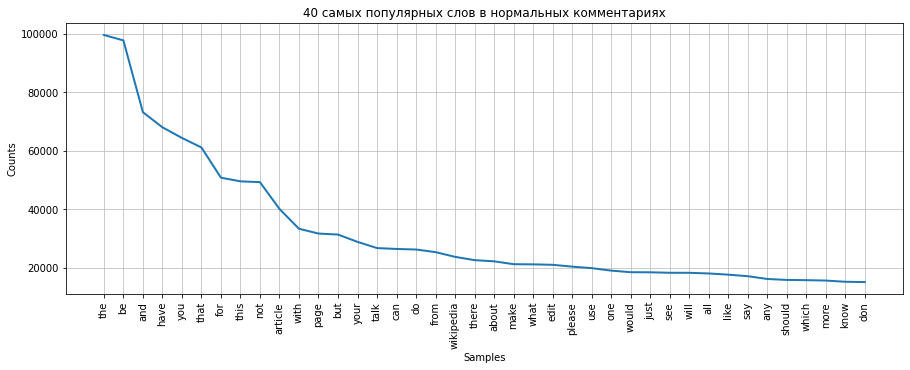

In [22]:
plt.rcParams['figure.figsize'] = [15, 5]
fdist = FreqDist(normal_corpus_joined)
fdist.plot(40,cumulative=False,\
           title='40 самых популярных слов в нормальных комментариях');

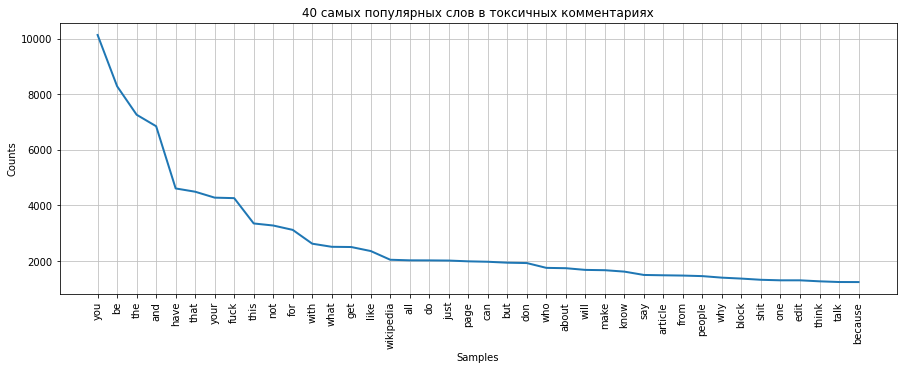

In [23]:
fdist = FreqDist(toxic_corpus_joined)
fdist.plot(40,cumulative=False,\
           title='40 самых популярных слов в токсичных комментариях');

**Промежуточный вывод:**
- Тексты очищены от мусора, лишних слов и неинформативных символов.
- Проведена лемматизация текстов.
- Проведен базовый частотный анализ. Видно, что в токсичных комментариях имеются специфичные слова с негативным оттенком (fuck, shit) 

## Разделение на выборки

Выделяем признаки и целевой признак

In [24]:
features = pd.Series(corpus,name='text')
target = df['toxic']

Выделяем тестовый набор features_test  и target_test (30%)

In [25]:
features_train, features_test, target_train, target_test =\
train_test_split(features, target,test_size=0.3,\
                 random_state=1234,stratify=target)

## Создание выборок

Создание тренировочного и тестового корпусов

In [26]:
corpus_train = features_train.values
corpus_test = features_test.values

Cоздадим словарь на основе величины TF-IDF для каждого слова. При этом избавимся от стоп-слов и очень редких слов.

In [27]:
#Загрузка английских стоп-слов

nltk.download('stopwords')

stopwords = set(nltk_stopwords.words('english'))

#Создание объекта класса TfidfVectorizer

count_tf_idf = TfidfVectorizer(stop_words=stopwords,min_df=10,ngram_range=(1,1)) 

#Обучене модели (создание словаря)

tf_idf_fit = count_tf_idf.fit(corpus_train) 

print("Размер словаря:", len(tf_idf_fit.vocabulary_))

[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Размер словаря: 11832


Сбросим индексацию в Сериях с целевыми признаками

In [28]:
target_train = target_train.reset_index(drop=True)
target_test = target_test.reset_index(drop=True)

Создадим наборы признаков на основе словаря tf_idf_fi

In [29]:
features_train =tf_idf_fit.transform(corpus_train) 
features_test =tf_idf_fit.transform(corpus_test)

**Промежуточный вывод:**
- Создан словарь на основе TF-IDF, содержащий 11832 слова.
- Созданы тренировочные и тестовые выборки

## Обучение моделей

### Логистическая регрессия

**Обучим и протестируем модель логистической регрессии с помощью gridsearch**

Создадим словарь оценок
(в нашем случае достаточно меры f1)

In [30]:
scoring = make_scorer(f1_score)

In [31]:
#датафрейм для параметров и точности моделей
model_param = pd.DataFrame\
(columns=['model_name','best_param','best_F1'])

Создадим модель на основе логистической регрессии с помощью gridsearchCV

In [32]:
#создаем pipeline

pipeline = Pipeline([
    ('tfidf',count_tf_idf),
    ('model',LogisticRegression(max_iter=600,random_state=12345))
])

#задаем словарь параметров

param_grid = {
    'model__C':range(1,102,20)}

#создаем модель

grid_lr = GridSearchCV(pipeline, cv=2, param_grid=param_grid,\
                    verbose=3,scoring=scoring)

Обучаем модель

In [33]:
%%time

grid_lr.fit(corpus_train,target_train)

Fitting 2 folds for each of 6 candidates, totalling 12 fits
[CV 1/2] END .....................................model__C=1; total time=   3.2s
[CV 2/2] END .....................................model__C=1; total time=   3.2s
[CV 1/2] END ....................................model__C=21; total time=   4.8s
[CV 2/2] END ....................................model__C=21; total time=   4.1s
[CV 1/2] END ....................................model__C=41; total time=   5.0s
[CV 2/2] END ....................................model__C=41; total time=   4.6s
[CV 1/2] END ....................................model__C=61; total time=   5.6s
[CV 2/2] END ....................................model__C=61; total time=   5.2s
[CV 1/2] END ....................................model__C=81; total time=   6.1s
[CV 2/2] END ....................................model__C=81; total time=   7.0s
[CV 1/2] END ...................................model__C=101; total time=   6.0s
[CV 2/2] END ...................................m

GridSearchCV(cv=2,
             estimator=Pipeline(steps=[('tfidf',
                                        TfidfVectorizer(min_df=10,
                                                        stop_words={'a',
                                                                    'about',
                                                                    'above',
                                                                    'after',
                                                                    'again',
                                                                    'against',
                                                                    'ain',
                                                                    'all', 'am',
                                                                    'an', 'and',
                                                                    'any',
                                                                    'are',
                  

Выводим лучшие параметры

In [34]:
grid_lr.best_params_

{'model__C': 21}

Смотрим лучший результат модели

In [35]:
best_score = grid_lr.best_score_
print("F1 мера на валидационной выборке:", round(best_score,2))

F1 мера на валидационной выборке: 0.75


Добавим параметры модели в датафрейм model_param 

In [36]:
new_row = {'best_param':grid_lr.best_params_,
           'model_name':'logistic regression',
           'best_F1':best_score}
model_param = model_param.append(new_row,ignore_index=True)

In [37]:
model_param

,model_name,best_param,best_F1
0,logistic regression,{'model__C': 21},0.753655


### Случайный лес

Обучим и протестируем модель случайного леса с помощью gridsearch

In [38]:
#создаем pipeline

pipeline = Pipeline([
    ('tfidf',count_tf_idf),
    ('model',RandomForestClassifier(n_estimators=20,\
                                    verbose=2,random_state=12345))
])

#задаем словарь параметров

param_grid = {
    'model__max_depth':range(100,201,50)}

#создаем модель

grid_rf = GridSearchCV(pipeline, cv=2, param_grid=param_grid,\
                    verbose=3,scoring=scoring)

Обучаем модель

In [39]:
%%time

grid_rf.fit(corpus_train,target_train)

Fitting 2 folds for each of 3 candidates, totalling 6 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 20


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


building tree 2 of 20
building tree 3 of 20
building tree 4 of 20
building tree 5 of 20
building tree 6 of 20
building tree 7 of 20
building tree 8 of 20
building tree 9 of 20
building tree 10 of 20
building tree 11 of 20
building tree 12 of 20
building tree 13 of 20
building tree 14 of 20
building tree 15 of 20
building tree 16 of 20
building tree 17 of 20
building tree 18 of 20
building tree 19 of 20
building tree 20 of 20


[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    5.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.4s finished


[CV 1/2] END ...........................model__max_depth=100; total time=   7.8s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


building tree 1 of 20
building tree 2 of 20
building tree 3 of 20
building tree 4 of 20
building tree 5 of 20
building tree 6 of 20
building tree 7 of 20
building tree 8 of 20
building tree 9 of 20
building tree 10 of 20
building tree 11 of 20
building tree 12 of 20
building tree 13 of 20
building tree 14 of 20
building tree 15 of 20
building tree 16 of 20
building tree 17 of 20
building tree 18 of 20
building tree 19 of 20
building tree 20 of 20


[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    5.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.4s finished


[CV 2/2] END ...........................model__max_depth=100; total time=   8.1s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 20


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s


building tree 2 of 20
building tree 3 of 20
building tree 4 of 20
building tree 5 of 20
building tree 6 of 20
building tree 7 of 20
building tree 8 of 20
building tree 9 of 20
building tree 10 of 20
building tree 11 of 20
building tree 12 of 20
building tree 13 of 20
building tree 14 of 20
building tree 15 of 20
building tree 16 of 20
building tree 17 of 20
building tree 18 of 20
building tree 19 of 20
building tree 20 of 20


[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    6.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.5s finished


[CV 1/2] END ...........................model__max_depth=150; total time=   9.7s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 20


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


building tree 2 of 20
building tree 3 of 20
building tree 4 of 20
building tree 5 of 20
building tree 6 of 20
building tree 7 of 20
building tree 8 of 20
building tree 9 of 20
building tree 10 of 20
building tree 11 of 20
building tree 12 of 20
building tree 13 of 20
building tree 14 of 20
building tree 15 of 20
building tree 16 of 20
building tree 17 of 20
building tree 18 of 20
building tree 19 of 20
building tree 20 of 20


[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    6.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.5s finished


[CV 2/2] END ...........................model__max_depth=150; total time=   9.5s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 20


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s


building tree 2 of 20
building tree 3 of 20
building tree 4 of 20
building tree 5 of 20
building tree 6 of 20
building tree 7 of 20
building tree 8 of 20
building tree 9 of 20
building tree 10 of 20
building tree 11 of 20
building tree 12 of 20
building tree 13 of 20
building tree 14 of 20
building tree 15 of 20
building tree 16 of 20
building tree 17 of 20
building tree 18 of 20
building tree 19 of 20
building tree 20 of 20


[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    7.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.5s finished


[CV 1/2] END ...........................model__max_depth=200; total time=  10.9s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 20


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


building tree 2 of 20
building tree 3 of 20
building tree 4 of 20
building tree 5 of 20
building tree 6 of 20
building tree 7 of 20
building tree 8 of 20
building tree 9 of 20
building tree 10 of 20
building tree 11 of 20
building tree 12 of 20
building tree 13 of 20
building tree 14 of 20
building tree 15 of 20
building tree 16 of 20
building tree 17 of 20
building tree 18 of 20
building tree 19 of 20
building tree 20 of 20


[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    7.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.5s finished


[CV 2/2] END ...........................model__max_depth=200; total time=  10.8s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 20


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.4s remaining:    0.0s


building tree 2 of 20
building tree 3 of 20
building tree 4 of 20
building tree 5 of 20
building tree 6 of 20
building tree 7 of 20
building tree 8 of 20
building tree 9 of 20
building tree 10 of 20
building tree 11 of 20
building tree 12 of 20
building tree 13 of 20
building tree 14 of 20
building tree 15 of 20
building tree 16 of 20
building tree 17 of 20
building tree 18 of 20
building tree 19 of 20
building tree 20 of 20
CPU times: user 1min 21s, sys: 332 ms, total: 1min 22s
Wall time: 1min 22s


[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:   23.3s finished


GridSearchCV(cv=2,
             estimator=Pipeline(steps=[('tfidf',
                                        TfidfVectorizer(min_df=10,
                                                        stop_words={'a',
                                                                    'about',
                                                                    'above',
                                                                    'after',
                                                                    'again',
                                                                    'against',
                                                                    'ain',
                                                                    'all', 'am',
                                                                    'an', 'and',
                                                                    'any',
                                                                    'are',
                  

Выводим лучшие параметры

In [40]:
grid_rf.best_params_

{'model__max_depth': 200}

Смотрим лучший результат

In [41]:
best_score = grid_rf.best_score_
print("F1 мера на валидационной выборке:", round(best_score,2))

F1 мера на валидационной выборке: 0.73


Добавим параметры модели в датафрейм model_param 

In [42]:
new_row = {'best_param':grid_rf.best_params_,
           'model_name':'random forest',
           'best_F1':best_score}
model_param = model_param.append(new_row,ignore_index=True)

In [43]:
model_param

,model_name,best_param,best_F1
0,logistic regression,{'model__C': 21},0.753655
1,random forest,{'model__max_depth': 200},0.729599


### Метод опорных векторов

Обучим и протестируем модель на основе метода случайных векторов с помощью gridsearch

In [44]:
#создаем pipeline

pipeline = Pipeline([
    ('tfidf',count_tf_idf),
    ('model',svm.SVC(kernel='linear',random_state=12345))
])

#задаем словарь параметров

param_grid = {
    'model__C':range(1,8,3)}

#создаем модель

grid_svm = GridSearchCV(pipeline, cv=2, param_grid=param_grid,\
                    verbose=3,scoring=scoring)

Обучаем модель

In [45]:
%%time

grid_svm.fit(corpus_train,target_train)

Fitting 2 folds for each of 3 candidates, totalling 6 fits
[CV 1/2] END .....................................model__C=1; total time= 4.6min
[CV 2/2] END .....................................model__C=1; total time= 4.7min
[CV 1/2] END .....................................model__C=4; total time= 6.5min
[CV 2/2] END .....................................model__C=4; total time= 6.2min
[CV 1/2] END .....................................model__C=7; total time= 6.9min
[CV 2/2] END .....................................model__C=7; total time= 6.5min
CPU times: user 56min 53s, sys: 8.37 s, total: 57min 1s
Wall time: 57min 3s


GridSearchCV(cv=2,
             estimator=Pipeline(steps=[('tfidf',
                                        TfidfVectorizer(min_df=10,
                                                        stop_words={'a',
                                                                    'about',
                                                                    'above',
                                                                    'after',
                                                                    'again',
                                                                    'against',
                                                                    'ain',
                                                                    'all', 'am',
                                                                    'an', 'and',
                                                                    'any',
                                                                    'are',
                  

Выводим лучшие параметры

In [46]:
grid_svm.best_params_

{'model__C': 4}

Смотрим лучший результат

In [47]:
best_score = grid_svm.best_score_
print("F1 мера на валидационной выборке:", round(best_score,2))

F1 мера на валидационной выборке: 0.76


Добавим параметры модели в датафрейм model_param

In [48]:
new_row = {'best_param':grid_svm.best_params_,
           'model_name':'svm',
           'best_F1':best_score}
model_param = model_param.append(new_row,ignore_index=True)

In [49]:
model_param

,model_name,best_param,best_F1
0,logistic regression,{'model__C': 21},0.753655
1,random forest,{'model__max_depth': 200},0.729599
2,svm,{'model__C': 4},0.760923


### Проверка на вменяемость

Оценим метрику f1 "модели" , предсказывающей отрицательную оценку комментария ('1').

In [50]:
dummy_clf = DummyClassifier(strategy='constant',constant=1)
dummy_clf.fit(features_train,target_train)
predicted = dummy_clf.predict(features_test)
result = round(f1_score(target_test,predicted),2)
print("F1 на тестовой выборке:", result)

F1 на тестовой выборке: 0.18


Тест на вменяемость пройден

### Проверка лучшей модели на тестовой выбоке

Наилучшие результаты на этапе тестирования моделей показала  модель, оснвоанная на методе опорных векторов (grid_svm). Протестируем данную модель на тестовой выборке.

Получим предсказания на тестовой выборке

In [53]:
%%time

prediction = grid_svm.predict(corpus_test)

CPU times: user 1min 46s, sys: 244 ms, total: 1min 46s
Wall time: 1min 46s


In [54]:
target_names = ['norm(0)', 'toxic(1)']
rep=classification_report(target_test,prediction,target_names=target_names)
print('Показатели лучшей модели на тестовой выборке')
print(rep)

Показатели лучшей модели на тестовой выборке
              precision    recall  f1-score   support

     norm(0)       0.97      0.99      0.98     42932
    toxic(1)       0.85      0.70      0.77      4856

    accuracy                           0.96     47788
   macro avg       0.91      0.84      0.87     47788
weighted avg       0.96      0.96      0.96     47788



In [75]:
print('Метрика f1 для Токсичных комментариев:'\
      ,round(f1_score(target_test,prediction),2))

Метрика f1 для Токсичных комментариев: 0.77


## Выводы

По результатм работы можно сделать следующие выводы:
- Комментарии содержали много неинформативной информации. Их тексты очищены от мусора, лишних слов и неинформативных символов.
- Проведена лемматизация текстов с учетом чати речи.
- Проведен базовый частотный анализ. Видно, что в токсичных комментариях имеются специфичные слова с негативным оттенком, а также отличия в наборе самых популярных слов от нормальных текстов.
- Самое лучшее значение метрики f1=0,76 для положительного класса (негативные комментарии) показала модель на основе метода опорных векторов. Однако время обучения  CPU_time для данной модели составляет более 20 мин. Для сравнения, модель логистической регресси обучается за секунды, однако метрика f1 у неё хуже - 0,72.
- В данной работе остро встал вопрос ограничений, связанных с вычислительными мощностями имеющегося оборудования.  Тренировочная выборка формировалась на основе словаря емкостью около 12000. Возможно, увеличив словарь и приенив n-граммы разного уровня, можно улучшить результат, но эти эксперименты кратно увеличивают требования к оперативной памяти и процессору.
- Стоит обратить внимание на отношение параметров precision (0,9) recall (0,67)  для токсичных комментраиев у лучшей модели. Модель редко ошибается, давая комментарию метку 'toxic', однако  при этом часто пропускает токсичные комментраии. 